LINEAR REGRESSION WITHOUT FRAMEWORKS: y = mx + b

In [80]:
# Import libraries and create data frame
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from google.colab import drive

drive.mount("/content/gdrive")  
!pwd 
%cd "/content/gdrive/MyDrive/IA4DS/AprendizajeDeMaquina/linearRegression"
!ls 

df = pd.read_csv('data.csv') 
df.head()

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/My Drive/IA4DS/AprendizajeDeMaquina/linearRegression
/content/gdrive/MyDrive/IA4DS/AprendizajeDeMaquina/linearRegression
data.csv  linearRegression.ipynb


,height,weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801


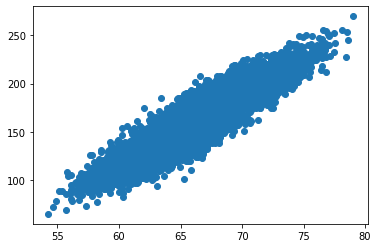

In [66]:
# Plot the data
plt.scatter(df.height, df.weight)
plt.show()

# Solution 1: Calculating m and b values using math

In [67]:
# Create x and y variables
x = df[['weight']]
y = df.height

Calculating the slope m of the regression line

1. Step calculating SSxx

In [68]:
# Calculate SSxx 
xmean = x.mean()
df['diffx'] = xmean - x
df['diffx_squared'] = df.diffx**2
SSxx = df.diffx_squared.sum()

2. Step calculating SSxy

In [69]:
# Calculate SSxy
ymean = y.mean()
df['diffy'] = ymean - y
SSxy = (df.diffx * df.diffy).sum()

Slope

In [70]:
# Slope: calculate m value
m = SSxy / SSxx


Calculating the intercept b of the regression line 

In [71]:
# Calculate the intercept 'b' of the regression line
b = ymean - m*xmean


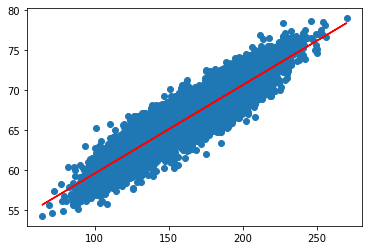

In [72]:
# Plot data and linear regression
import matplotlib.pyplot as plt
plt.scatter(x,y)
plt.plot(x, m*x+b, 'r' )

Predict values with the model

In [73]:
# Predict values
def predict(value):
  predict = m * value + b
  return predict 

In [74]:
# Test for prediction of 67.99831
predict(67.99831)

weight    56.012985
dtype: float64

Sklearn comparison


In [75]:
# Compare result of the model with the result of sklearn
from sklearn import linear_model
model = linear_model.LinearRegression()
model.fit(x,y)

LinearRegression()

In [76]:
# Get sklearn linear regression value
model.coef_
model.intercept_
model.predict([[140]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([63.99169389])

## Solution 2: implementing a Linear Regression Class



In [77]:
class LinearRegression():      
    def __init__(self, learning_rate, iterations):
        self.learning_rate = learning_rate
        self.iterations = iterations
          
    # Training function
    def fit(self, X, Y):
        # m = training_examples, n = features
        self.m, self.n = X.shape
        # Declare Weight 
        self.W = np.zeros(self.n)
        self.b = 0
        self.X = X
        self.Y = Y
        # Gradient descent learning
        for i in range(self.iterations):
            self.update_weights()
        return self
      
    # Function for updating weights
    def update_weights(self):
        Y_pred = self.predict(self.X)
        # Get gradients  
        dW = - (2 * (self.X.T).dot(self.Y - Y_pred)) / self.m
        db = - 2 * np.sum(self.Y - Y_pred) / self.m 
        # Update weights
        self.W = self.W - self.learning_rate * dW
        self.b = self.b - self.learning_rate * db
        return self
      
    # Predict function
    def predict(self, X):
        return X.dot(self.W) + self.b

Predicted values  [-0.713  0.415  1.35 ]
Real values  [-0.23   0.918  1.879]


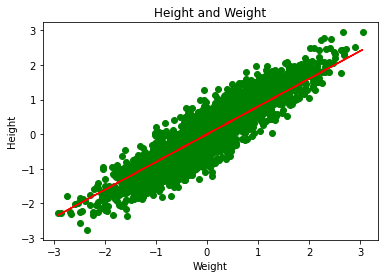

In [81]:
# Assign x and y values; scaling data 
X = df.iloc[:,:-1].values
X = preprocessing.scale(X)
Y = df.iloc[:,1].values
Y = preprocessing.scale(Y)
  
# Create train and test set
x_train, x_test, y_train, y_test = train_test_split(X, Y)
  
# Training using the class model
lrModel = LinearRegression(learning_rate = 0.01, iterations = 100)
lrModel.fit(x_train, y_train)
  
# Make predictions
predictions = lrModel.predict(x_test)
print("Predicted values ", np.round(predictions[:3], 3)) 
print("Real values ", np.round(y_test[:3],3))
  
# Visualization of test values and predictions 
plt.scatter(x_test, y_test, color = 'green')
plt.plot(x_test, predictions, color = 'red')
plt.title('Height and Weight')
plt.xlabel('Weight')
plt.ylabel('Height')
plt.show()